# Contraceptive Dataset

In [874]:
#!pip3 install numpy

In [875]:
#!pip3 install pandas

In [876]:
#!pip3 install matplotlib

In [877]:
#!pip3 install seaborn

In [878]:
#!pip3 install sklearn

In [879]:
#!pip3 install warnings

In [880]:
#!pip3 install plotly

In [881]:
# importing libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Let's take a quick look at our data and its format

In [882]:
data = pd.read_csv('contraceptive_for_students.csv')
data.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [883]:
print("The Dataframe has " + str(data.shape[0]) + " rows and " + str(data.shape[1]) + " columns")

The Dataframe has 1473 rows and 10 columns


We can get more information about the columns of our dataset from its provider

source: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

Attribute Information:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4 (1=Professional, technical and clerical, 2=sales, services, 3=manual, 4=agriculture)
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

### Initial questions

1. What are the best predictors of whether a woman uses contraceptives or not? Could it be the number of children a woman has, as the more children someone has, it is expected that she should not be using contraceptives.
2. Are there any co-founding factors that affect this dataset? Cost and Insurance? Age and Number of Children? Wife education, husband education and standard of living?
3. There is no attribute information regarding Husband's occupation, i.e, we do not know what each of the classes represent. Can we use our other variables to try to get an idea of what they mean?
4. Are there any outliers in this dataset? If yes, who are they?
5. What are the best indicators to help predict what kind of contraception (if any) a married Indonesian woman in the age group of 15-48 prefers? Could her choice be best determined by the number of children she bore, her education, her religion, the characteristics of her spouse or any external sources such as media exposure and her working status.


To better understand the nature of the dataset, we can try and understand why the data was collected in the first place. The data comes from the 1987 National Indonesia Contraceptive Prevalence Survey. The dataframe below contains information about the indonesian population and the number of births per woman.

In [884]:
# indonesia_pop = pd.read_csv('final_proj_data/contraceptive/indonesia_population.csv')
# indonesia_pop.head()

We will extract the year from the `date` column of the dataframe and create a new `year` column.

In [885]:
# indonesia_pop['year'] = pd.to_datetime(indonesia_pop['date']).dt.year
# indonesia_pop.head()

In [886]:
# indonesia_pop.describe()

The dataset contains the predicted fertility rate of the Indonesia from 1950 and projections until 2100 but since we are just interested in the historical trends, we will just be using years before 2020.

In [887]:
# indonesia_pop = indonesia_pop[indonesia_pop['year'] <= 2020]

In [888]:
# sns.lineplot(x="year", y="Births per Woman", data=indonesia_pop)
# plt.ylabel("Births per Woman")
# plt.xlabel("Year")
# plt.title("Birth Rate v/s Year");

We can see there was a decline in birth rates starting in the 1970s which prompted the government of Indonesia to conduct a survey at the national level to understand what was happening.

## Checking for missing values

We check for any missing values before proceeding with some visualizations

In [889]:
data.isnull().sum(axis=0)

wife_age              0
wife_education        0
husband_education     0
num_child             0
wife_religion         0
wife_work             0
husband_occupation    0
standard_living       0
media_exposure        0
contraceptive         0
dtype: int64

Luckily for us, none of our features seem to be missing values.

# Visualizations

### Number of people using each type of contraceptive

We first get an idea of how many women are using each type of contraceptive.

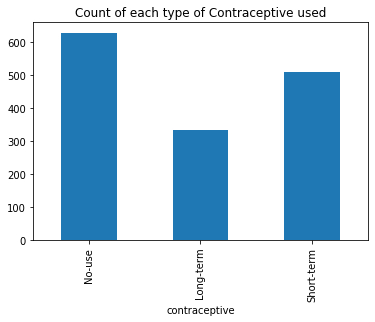

In [890]:
data[['contraceptive']].groupby('contraceptive').size().plot(kind='bar')
plt.xticks([0, 1, 2], labels=['No-use', 'Long-term', 'Short-term'])
plt.title("Count of each type of Contraceptive used");

In [891]:
(data[['contraceptive']].groupby('contraceptive').size() / len(data) * 100)

contraceptive
1    42.701969
2    22.606925
3    34.691107
dtype: float64

#### Religion and Contraceptives

The percentage of the women of islamic religion is:

In [892]:
len(data[data['wife_religion'] == 1]) / len(data) * 100

85.06449422946368

Let us see if the use of contraceptives is affected by religion

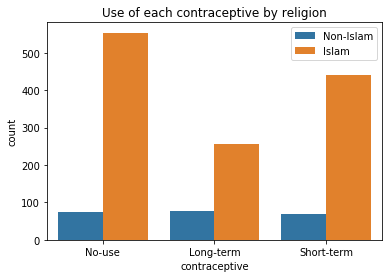

In [893]:
sns.countplot(x='contraceptive',data=data,hue="wife_religion")
plt.xticks([0, 1, 2], labels=['No-use', 'Long-term', 'Short-term']);
plt.legend(['Non-Islam', 'Islam'])
plt.title('Use of each contraceptive by religion');

A little more than 500 muslim women do not use contraceptives. However, it is quite surprising to see that there is still a significant amount of muslims who use some type of contraceptive. We were expecting to see a lot more muslim women to not be using contraceptives since the use of contraceptives is banned in Islam. We can examine the percentages of muslim and non-muslim people using each type of contracetive:

In [894]:
(data[data['wife_religion'] == 1][['contraceptive']].groupby('contraceptive').size() / (len(data[data['wife_religion'] == 1])) * 100) #.plot(kind='bar')

contraceptive
1    44.213887
2    20.510774
3    35.275339
dtype: float64

In [895]:
(data[data['wife_religion'] == 0][['contraceptive']].groupby('contraceptive').size() / (len(data[data['wife_religion'] == 0])) * 100) #.plot(kind='bar')

contraceptive
1    34.090909
2    34.545455
3    31.363636
dtype: float64

We can observe that the percentage of muslim women using each type of category seems to be quite similar to that of the general population. In fact, it appears that it is the people of non-islamic faith who are indifferent to the type of contraceptive with an almost equal proportion of women using each type of contraceptive.

#### Wife education and contraceptive

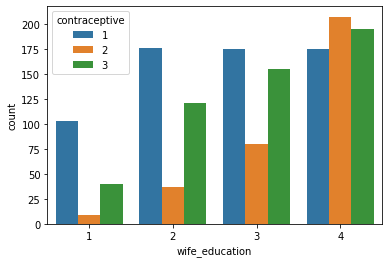

In [896]:
sns.countplot(x='wife_education',data=data,hue="contraceptive")
plt.xticks([0, 1, 2, 3], labels=['1', '2', '3', '4']);

This visualization depicts that women with lesser education use no contraceptive at all compared to the other forms, whereas those with much more education have an evenly divided distribution.

Noting this pattern raises an interesting question: is a womens age and education level strongly correlated? (We will not be examining this in great detail to keep our notebook concise, but please find below a picture)

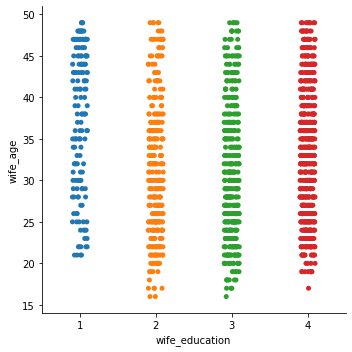

In [897]:
sns.catplot(y = 'wife_age', x="wife_education", data=data)

#### Wife age and contraceptives

We can try to find whether there are any interesting patterns in the use of contraceptives with age. We first group all the women using the same type of contraceptive:

In [898]:
no_contraceptive_count = data[data['contraceptive'] == 1].groupby('wife_age', as_index=False).count()
no_contraceptive_count.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,16,2,2,2,2,2,2,2,2,2
1,17,2,2,2,2,2,2,2,2,2
2,18,5,5,5,5,5,5,5,5,5
3,19,9,9,9,9,9,9,9,9,9
4,20,17,17,17,17,17,17,17,17,17


In [899]:
short_term_contraceptive_count = data[data['contraceptive'] == 3].groupby('wife_age', as_index=False).count()
long_term_contraceptive_count = data[data['contraceptive'] == 2].groupby('wife_age', as_index=False).count()

Now we can see how consumption changes with age.

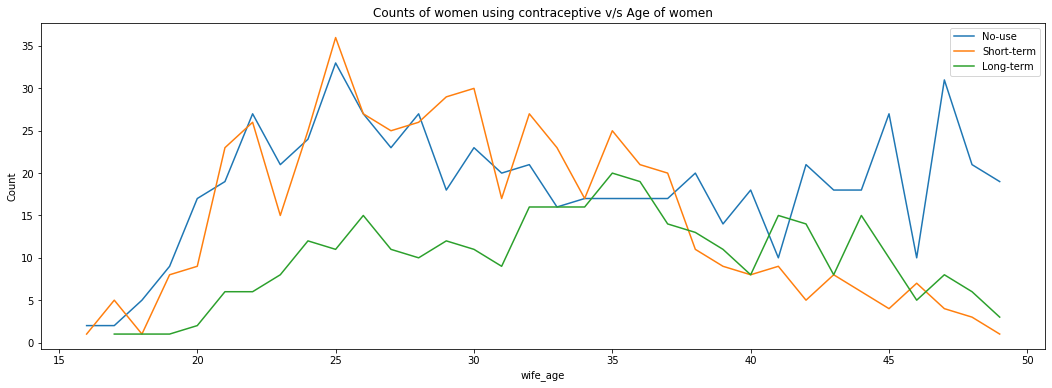

In [900]:
f, ax = plt.subplots(1, 1, figsize=(18,6))
sns.lineplot(x='wife_age', y='contraceptive', data=no_contraceptive_count)
sns.lineplot(x='wife_age', y='contraceptive', data=short_term_contraceptive_count)
sns.lineplot(x='wife_age', y='contraceptive', data=long_term_contraceptive_count)
ax.legend(labels=["No-use","Short-term","Long-term"])
plt.ylabel("Count")
plt.title("Counts of women using contraceptive v/s Age of women");

While the plot does give us a vague idea of the use of contraceptive across all ages, the lines are jagged and we can smooth them by fitting polynomials to the line. We fit degree 2 polynomials to the `Short-term` and `Long-term` trend lines and a degree 3 polynomial to the `No-use` line:

In [901]:
contraceptive_count = data.groupby('wife_age', as_index=False).count()

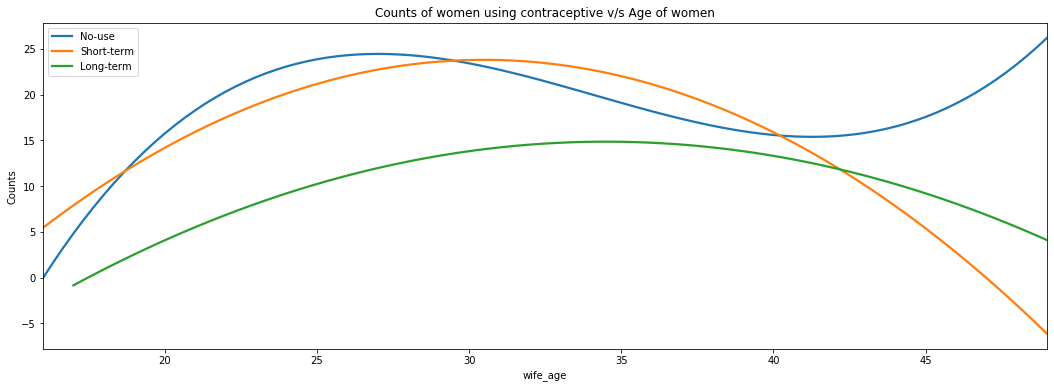

In [902]:
f, ax = plt.subplots(1, 1, figsize=(18,6))
sns.regplot(x='wife_age', y='contraceptive', data=no_contraceptive_count, order=3, ci=None, scatter=False)
sns.regplot(x='wife_age', y='contraceptive', data=short_term_contraceptive_count, order=2, ci=None, scatter=False)
sns.regplot(x='wife_age', y='contraceptive', data=long_term_contraceptive_count, order=2, ci=None, scatter=False)
ax.legend(labels=["No-use","Short-term","Long-term"])
plt.ylabel("Counts")
plt.title("Counts of women using contraceptive v/s Age of women");

The general trend in the use of long-term contraceptives indicates that women around 35 years old tend to use them  more than women of other ages. Interestingly, all 3 lines have a decreasing trend past age 35 which could simply be because there is less data about people above that age. An important aspect of this graph is that it captures only a single snapshot in time. Hence, this is not a longitudinal study and we are not observing how the same women’s use of contraceptives change over time.

#### Standard of living and contraceptives

Text(0.5, 1.0, 'Number of children according to standard of living')

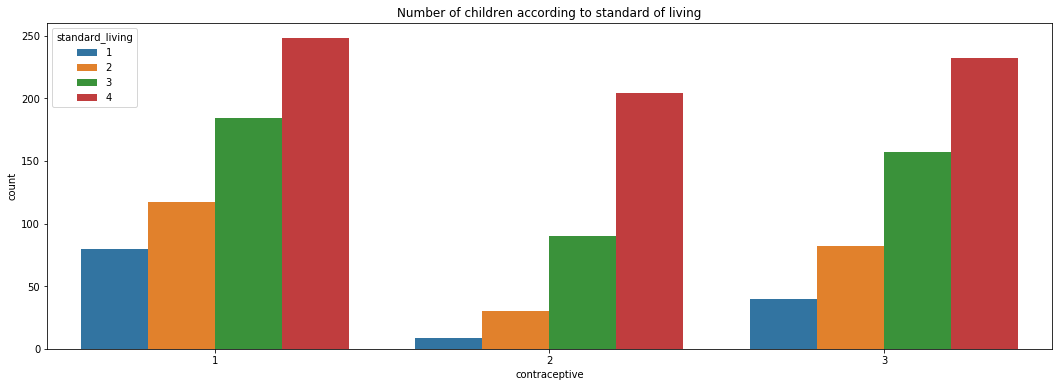

In [903]:
plt.figure(figsize=(18,6))
sns.countplot(x='contraceptive',data=data,hue="standard_living")
plt.title("Number of children according to standard of living")

Plotting the type of contraceptive against the standard of living shows an interesting, though not very prominent trend. Another interesting observation is that amongst those USING contraceptives (short term and long term), there seems to be a pattern between type of contraception and standard of living. It seems that the majority of people in every standard of living bracket prefer shorter term contraception (such as pills, and condoms) over longer term contraception (such as intra-uterine devices or vasectomy). Under the simplifying assumption that standard of living is synonymous to family income, this could point to confounding factors such as the cost of long term contraception and associated surgeries which could possibly explain low participation from people with the lowest standard of living.

#### Number of children and contraceptive

A quite standard expectation about the relationship between the number of children a woman has and her use of contraceptive would be an inverse one. This is because we would expect a woman who is using contraceptives to be having less children. 

In [904]:
data.groupby('contraceptive').mean()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure
contraceptive,,,,,,,,,
1,33.424483,2.670906,3.281399,2.934817,0.880763,0.729730,2.200318,2.953895,0.117647
2,34.384384,3.456456,3.663664,3.738739,0.771772,0.732733,1.840841,3.468468,0.030030
3,30.244618,2.988258,3.459883,3.352250,0.864971,0.784736,2.254403,3.136986,0.048924


An phenomena is that amongst all the groups of women, the ones using no contraceptives have the lowest number of average children (3.28). Surprisingly, people using short term contraceptives have more children on average than those who used none at all, while people using long-term contraceptives have the highest number of children on average of the three groups. Though it seems counterintuitive, since we would expect contraceptives to lead to fewer children, we believe that there are various possible explanations for this. 

The most probably one being that long term contraception was a sort of last resort that was adopted by women who already had a lot of children and wanted to take the most catious stance. Therefore, it seems that the average number of children is high since particpants using this method of contraception adopted it due to the fact that they have so many children.

Let us see the distribution of the number of children. 

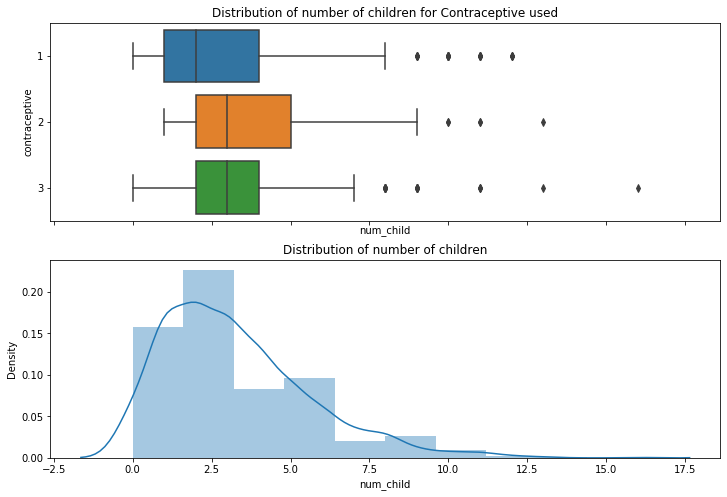

In [905]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))
ax1.set_title('Distribution of number of children for Contraceptive used')
ax2.set_title('Distribution of number of children') 
sns.boxplot(x='num_child', y='contraceptive', data=data, ax=ax1, orient='h')
plt.ylabel("Density")
sns.distplot(data['num_child'], bins=10, ax=ax2);

In [906]:
data[['num_child']].describe()

,num_child
count,1473.000000
mean,3.261371
std,2.358549
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,16.000000


The mean number of children is around 3.2 and the median is 3. One interesting obervation is that quite a few women have had above 10 children, which is about 3 standard deviations above the mean. Let us inspect those women more closely:

In [907]:
data[data['num_child'] > 10]

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
182,42,1,3,12,1,1,3,3,0,1
192,44,1,1,11,1,1,4,1,1,1
200,42,1,4,11,0,1,2,2,1,1
249,46,3,2,11,1,0,2,2,1,1
485,47,3,4,11,1,0,2,3,0,2
519,43,2,4,13,1,1,2,3,0,2
561,49,3,3,11,1,1,1,4,0,2
653,48,4,4,16,1,1,1,4,0,3
675,49,4,3,13,1,1,1,4,0,3
747,44,4,4,11,1,1,1,4,0,3


In [908]:
print('The mean age of these women is %s'% np.round((np.mean(data[data['num_child'] > 10]['wife_age']))))
print('whereas the mean age of the general population is %s'% np.round((np.mean(data['wife_age']))))

The mean age of these women is 44.0
whereas the mean age of the general population is 33.0


Those women are quite older than the general population which might explain why they have more children. However, we can also notice that quite a few of them are using contraceptives.

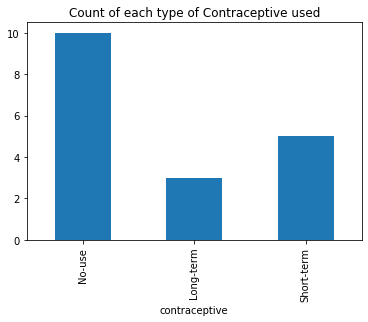

In [909]:
data[data['num_child'] > 10][['contraceptive']].groupby('contraceptive').size().plot(kind='bar')
plt.xticks([0, 1, 2], labels=['No-use', 'Long-term', 'Short-term'])
plt.title("Count of each type of Contraceptive used");

It seems a little odd for some women to have more than 10 children and also use short-term or long-term contraceptives. We decide that these women will be dropped from the dataset for this reason.

In [910]:
drop_indices = data[data['num_child'] > 10][data['contraceptive'] != 1].index
drop_indices

Int64Index([485, 519, 561, 653, 675, 747, 998, 1344], dtype='int64')

We will get rid of those women who have more than 10 children and who claim to be using some form of contraceptive.

In [911]:
data = data.drop(drop_indices)
data.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


Ensuring we have dropped the right datapoints

In [912]:
data[data['num_child'] > 10]

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
182,42,1,3,12,1,1,3,3,0,1
192,44,1,1,11,1,1,4,1,1,1
200,42,1,4,11,0,1,2,2,1,1
249,46,3,2,11,1,0,2,2,1,1
1001,41,3,2,11,1,1,2,3,0,1
1013,38,1,2,12,1,1,2,3,0,1
1063,45,2,3,11,1,1,2,3,0,1
1138,48,3,4,11,1,1,1,4,0,1
1139,47,2,3,12,1,1,3,1,0,1
1142,42,1,3,12,1,1,2,4,0,1


#### Bivariate analysis of Age and Number of children

In [913]:
px.scatter(data, x = "wife_age", y = "num_child", color="contraceptive")

This scatterplot captures 3 variables, `num_child`, `wife_age` and `contraceptive` to give us a better snapshot of the trends amongst age groups. While the information we have is restricted to the a point in time, we have to make certain assumptions to perform any type of analysis. One such assumption is: the graph represents every womens latest preferences about contraceptives, for example a '3' indicates that the women is still using short term contraception. (As opposed to the fact that she had used short term contraceptive in her 30s but no longer used contraceptive). Therefore there seems to be a trend where the use of contraception becomes more common amongst younger women as opposed to older women. Therefore, it seems that younger mothers want fewer kids. While one explanation could be to education levels, this is not abundantly clear.

## First approach

We can get a baseline for some models and will try to improve those models in subsequent iterations. First, we split our data into a train and test set, keeping 20% of the data for testing.

In [914]:
data = pd.read_csv('contraceptive_for_students.csv')
features = data.drop('contraceptive', axis=1)
target = data['contraceptive']

In [915]:
from sklearn.model_selection import train_test_split

In [916]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=70)
#saving copies of our train and test sets
X_train_original, X_test_original, y_train_original, y_test_original = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

To get a sense of how well our model is doing, we will be using the accuracy metric. We will also be using 5 fold cross validation on our train set to estimate our model's performance on the test set.

In [917]:
from sklearn.model_selection import cross_val_score

In [918]:
def cross_validate_score(model, x, y):
    '''calculates the mean accuracy score on the validation sets'''
    return np.mean(cross_val_score(model, x, y, cv=5))

We will be using 5 types of models: A logistic regression classifier, a ridge classifier, k-neighrest-neighbors, a decision tree and a random forest. We note that the difference between the logistic regression classifier and the ridge classifier - both linear models -  is that the loss function for the ridge classifier is not cross entropy.

In [919]:
from sklearn.linear_model import LogisticRegression

In [920]:
linear_model = LogisticRegression(max_iter=10000, multi_class='ovr')
cross_validate_score(linear_model, X_train, y_train)

0.505989902632528

In [921]:
from sklearn.linear_model import RidgeClassifier

In [922]:
ridge = RidgeClassifier()
cross_validate_score(ridge, X_train, y_train)

0.5042841687702848

In [923]:
from sklearn.neighbors import KNeighborsClassifier

In [924]:
knn = KNeighborsClassifier()
cross_validate_score(knn, X_train, y_train)

0.5280310133429499

In [925]:
from sklearn.tree import DecisionTreeClassifier

In [926]:
tree = DecisionTreeClassifier(random_state=21)
cross_validate_score(tree, X_train, y_train)

0.49407861521817525

In [927]:
from sklearn.ensemble import RandomForestClassifier

In [928]:
forest = RandomForestClassifier(random_state=21)
cross_validate_score(forest, X_train, y_train)

0.5296934727731699

We create a dataframe where we will store and compare the accuracies of our different models.

In [929]:
model_accuracies = pd.DataFrame(columns=['model_type'], data=['linear', 'ridge', 'knn', 'tree', 'forest'])

In [930]:
def compare_models(linear_model, ridge_model, knn_model, tree_model, forest_model):
    #cross validation score for linear model
    score1 = cross_validate_score(linear_model, X_train, y_train)
    #cross validation score for ridge model
    score2 = cross_validate_score(ridge, X_train, y_train)
    #cross validation score for knn model
    score3 = cross_validate_score(knn, X_train, y_train)
    #cross validation score for decision tree
    score4 = cross_validate_score(tree, X_train, y_train)
    #cross validation score for random forest
    score5 = cross_validate_score(forest, X_train, y_train)
    return score1, score2, score3, score4, score5

In [931]:
# def compare_models():
#     #cross validation score for linear model
#     linear_model = LogisticRegression(max_iter=10000, multi_class='ovr')
#     score1 = cross_validate_score(linear_model, X_train, y_train)
#     #cross validation score for ridge model
#     ridge = RidgeClassifier()
#     score2 = cross_validate_score(ridge, X_train, y_train)
#     #cross validation score for knn model
#     knn = KNeighborsClassifier()
#     score3 = cross_validate_score(knn, X_train, y_train)
#     #cross validation score for decision tree
#     tree = DecisionTreeClassifier(random_state=5)
#     score4 = cross_validate_score(tree, X_train, y_train)
#     #cross validation score for random forest
#     forest = RandomForestClassifier(random_state=5)
#     score5 = cross_validate_score(forest, X_train, y_train)
#     return score1, score2, score3, score4, score5

In [932]:
model_accuracies['base_accuracy'] = compare_models(linear_model, ridge, knn, tree, forest)
model_accuracies

,model_type,base_accuracy
0,linear,0.505990
1,ridge,0.504284
2,knn,0.528031
3,tree,0.494079
4,forest,0.529693


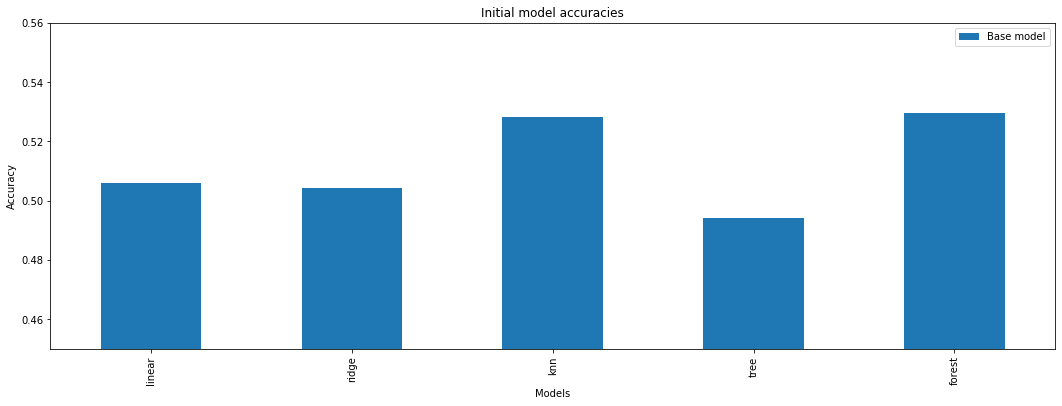

In [933]:
ax = model_accuracies.set_index('model_type').plot(kind='bar',figsize=(18,6))
plt.title('Initial model accuracies')
ax.legend(['Base model'])
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0.45, 0.56);

All of our models, except for the decision tree, achieve an accuracy of about 50%. The decision tree is in fact the worst model, probably because it is overfitting to the train set and performing poorly in the validation set. 

Now that we have some baseline statistics for accuracy, let us try and improve our models. We can first proceed by standardizing our numerical features and one-hot encoding the categorical features.

In [934]:
numerical_features = ['wife_age', 'num_child']
categorical_features = ['wife_education', 'husband_education', 
                        'wife_religion', 'wife_work', 'husband_occupation',
                        'standard_living', 'media_exposure']

In [935]:
def normalize_feature(dataframe, feature):
    '''normalizes the feature of a particular dataframe 
    and returns the dataframe'''
    column = dataframe[feature]
    #calculate mean of the array
    mean = np.mean(column)
    #calculate standard deviation of the array
    std = np.std(column)
    normalized_column = (column - mean) / std
    dataframe['normalized_' + feature] = normalized_column
    #drop original column
    dataframe.drop(feature, inplace=True, axis=1)
    return dataframe

In [936]:
#normalize all of our numerical features
for feature in numerical_features:
    X_train = normalize_feature(X_train, feature)
    X_test = normalize_feature(X_test, feature)
X_train.head()

,wife_education,husband_education,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,normalized_wife_age,normalized_num_child
1384,4,4,1,1,1,4,0,0.416954,-0.119384
274,3,4,1,0,2,3,0,-1.175373,-0.537940
1218,3,4,1,1,3,4,0,2.009281,0.299172
913,4,4,1,1,1,4,0,-0.562940,-0.537940
1038,3,3,1,0,2,4,0,-1.175373,-0.956496


In [937]:
def encode(dataframe, feature):
    '''one hot encodes the feature in our dataframe
    and returns the dataframe'''
    #converts the feature to vectors
    dummies = pd.get_dummies(dataframe[feature], prefix=feature)
    #adds the vectors to the original dataframe
    result = pd.concat([dataframe, dummies], axis=1)
    #removes the original feature from our dataframe
    result.drop(feature, inplace=True, axis=1)
    return result

In [938]:
#one-hot encodes all of our categorical features
for feature in categorical_features:
    X_train = encode(X_train, feature)
    X_test = encode(X_test, feature)
X_train.head()

,normalized_wife_age,normalized_num_child,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,husband_education_4,...,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4,standard_living_1,standard_living_2,standard_living_3,standard_living_4,media_exposure_0,media_exposure_1
1384,0.416954,-0.119384,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
274,-1.175373,-0.537940,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1218,2.009281,0.299172,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
913,-0.562940,-0.537940,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
1038,-1.175373,-0.956496,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [939]:
#my addition
model_accuracies['one_hot_and_normalized_accuracy'] = compare_models(linear_model, ridge, knn, tree, forest)
model_accuracies

,model_type,base_accuracy,one_hot_and_normalized_accuracy
0,linear,0.505990,0.513624
1,ridge,0.504284,0.515308
2,knn,0.528031,0.483862
3,tree,0.494079,0.484702
4,forest,0.529693,0.512712


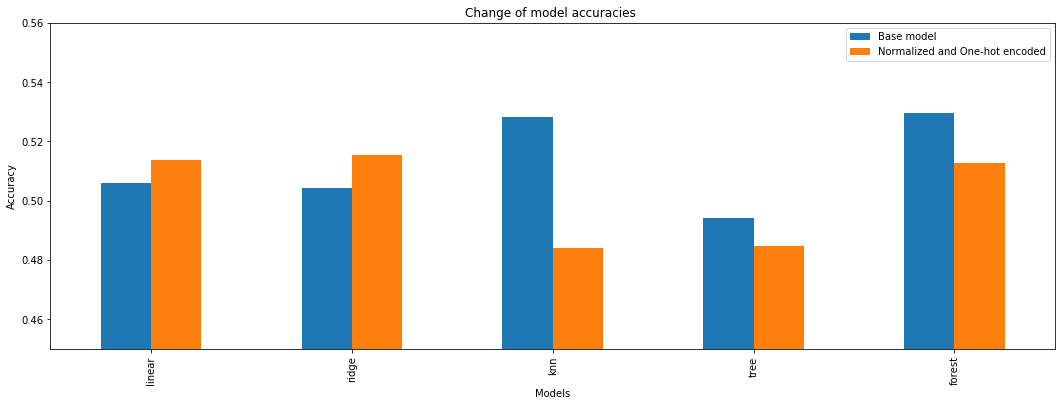

In [940]:
#my addition
ax = model_accuracies.set_index('model_type').plot(kind='bar',figsize=(18,6))
plt.title('Change of model accuracies ')
ax.legend(['Base model', 'Normalized and One-hot encoded'])
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0.45, 0.56);

#### Outliers

We will also try getting rid of outliers. We will define an outlier for our numerical variables as the datapoints being above 3 standard deviations of the mean of the numerical feature

In [941]:
X_train.shape

(1178, 24)

In [942]:
# outlier_indices = []
# outlier_indices.extend(X_train[X_train['normalized_wife_age'] > 3].index.to_list())
# outlier_indices.extend(X_train[X_train['normalized_wife_age'] < -3].index.to_list())
# outlier_indices.extend(X_train[X_train['normalized_num_child'] > 3].index.to_list())
# outlier_indices.extend(X_train[X_train['normalized_num_child'] < -3].index.to_list())
# outlier_indices

In [943]:
# X_train = X_train.drop(outlier_indices)
# y_train = y_train.drop(outlier_indices)

In [944]:
X_train.shape

(1178, 24)

Using that method, we got rid of 1178 - 1164 = 14 outliers from our dataset. Let us see if the data cleaning has improved the accuracies of our models.

In [945]:
model_accuracies['no_outlier_and_normalized_accuracy'] = compare_models(linear_model, ridge, knn, tree, forest)
model_accuracies

,model_type,base_accuracy,one_hot_and_normalized_accuracy,no_outlier_and_normalized_accuracy
0,linear,0.505990,0.513624,0.513624
1,ridge,0.504284,0.515308,0.515308
2,knn,0.528031,0.483862,0.483862
3,tree,0.494079,0.484702,0.484702
4,forest,0.529693,0.512712,0.512712


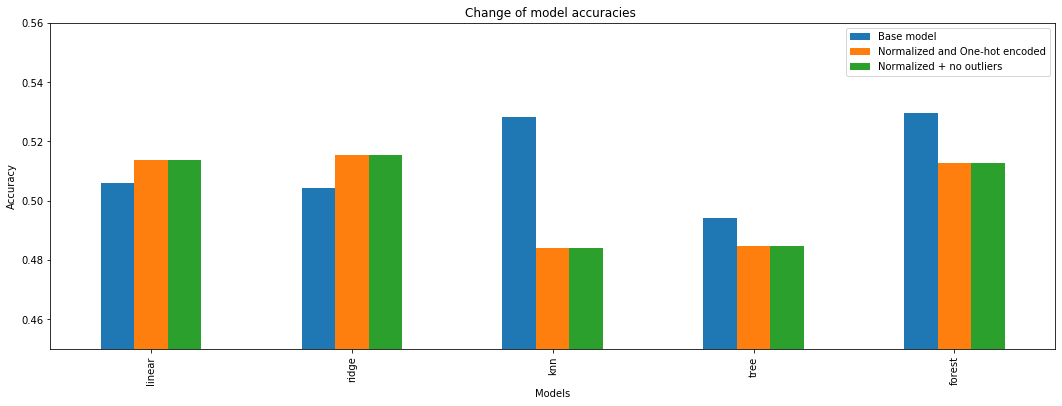

In [946]:
ax = model_accuracies.set_index('model_type').plot(kind='bar',figsize=(18,6))
plt.title('Change of model accuracies ')
ax.legend(['Base model', 'Normalized and One-hot encoded','Normalized + no outliers'])
#ax.legend(['Base model', 'Normalized + no outliers','Normalised + no outliers + diffsets'])
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0.45, 0.56);

In general, there was an improvement in the accuracy scores for our linear and ridge models, probably due to the fact that outliers were removed. However, there was a drop in the accuracy scores of the random forest and the neighrest neighbour classifier.

We realized that one-hot encoding our categorical variables brought up two problems that are more particular to tree-based models:

1. Our tree based models tend to assign more importance to the numerical variables due to the resulting sparsity of categorical variables.
2. A  categorical variable must now meet a higher threshold for a node close to the root to split which has a negative effect on performance. 

For that reason, we will be using the original data, without one-hot encoding, for our tree and forest models.

In [947]:
X_train_trees = X_train_original.copy()
X_test_trees = X_test_original.copy()
for feature in numerical_features:
    X_train_trees = normalize_feature(X_train_trees, feature)
    X_test_trees = normalize_feature(X_test_trees, feature)
#X_train_trees = X_train_trees.drop(outlier_indices)
X_train_trees.head()

,wife_education,husband_education,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,normalized_wife_age,normalized_num_child
1384,4,4,1,1,1,4,0,0.416954,-0.119384
274,3,4,1,0,2,3,0,-1.175373,-0.537940
1218,3,4,1,1,3,4,0,2.009281,0.299172
913,4,4,1,1,1,4,0,-0.562940,-0.537940
1038,3,3,1,0,2,4,0,-1.175373,-0.956496


We need to modify our compare model function so that it uses the correct dataset for the tree-based models.

In [948]:
def compare_models(linear_model, ridge_model, knn_model, tree_model, forest_model):
    #cross validation score for linear model
    score1 = cross_validate_score(linear_model, X_train, y_train)
    #cross validation score for ridge model
    score2 = cross_validate_score(ridge, X_train, y_train)
    #cross validation score for knn model
    score3 = cross_validate_score(knn, X_train, y_train)
    #cross validation score for decision tree
    score4 = cross_validate_score(tree, X_train_trees, y_train)
    #cross validation score for random forest
    score5 = cross_validate_score(forest, X_train_trees, y_train)
    return score1, score2, score3, score4, score5

In [949]:
# def compare_models():
#     linear_model = LogisticRegression(max_iter=10000, multi_class='ovr')
#     score1 = cross_validate_score(linear_model, X_train, y_train)
#     ridge = RidgeClassifier()
#     score2 = cross_validate_score(ridge, X_train, y_train)
#     knn = KNeighborsClassifier()
#     score3 = cross_validate_score(knn, X_train, y_train)
#     #changed dataset for desision tree
#     tree = DecisionTreeClassifier(random_state=8)
#     score4 = cross_validate_score(tree, X_train_trees, y_train)
#     #changed dataset for random forest
#     forest = RandomForestClassifier(random_state=8)
#     score5 = cross_validate_score(forest, X_train_trees, y_train)
#     return score1, score2, score3, score4, score5

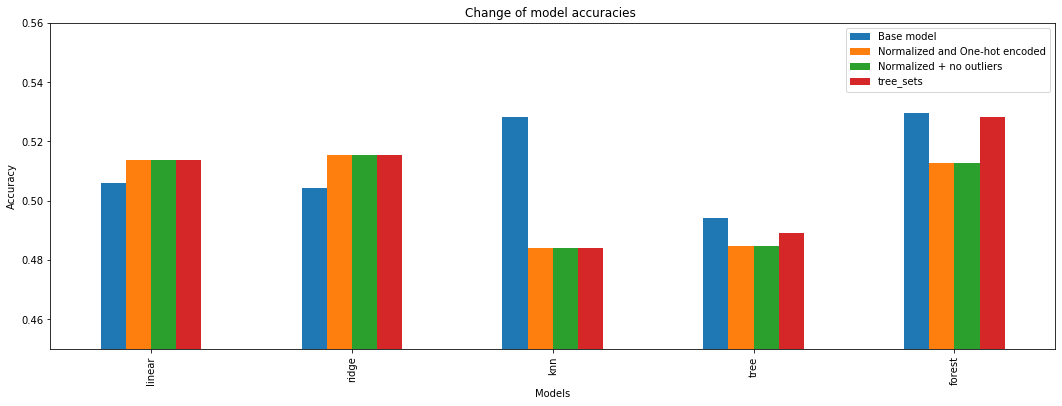

In [950]:
model_accuracies['no_outlier_and_normalized_accuracy_diffsets'] = compare_models(linear_model, ridge, knn, tree, forest)
ax = model_accuracies.set_index('model_type').plot(kind='bar',figsize=(18,6))
plt.title('Change of model accuracies ')
ax.legend(['Base model', 'Normalized and One-hot encoded','Normalized + no outliers','tree_sets'])
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0.45, 0.56);

The random forest performs much better than before just by not using one-hot encoding for the reasons explained above.

### Collinearity in features

We can use correlation of features to try and figure out which features are the best predictors for the type of contraceptives used and if there are any features which are related to each other. We would like to avoid redundancy.

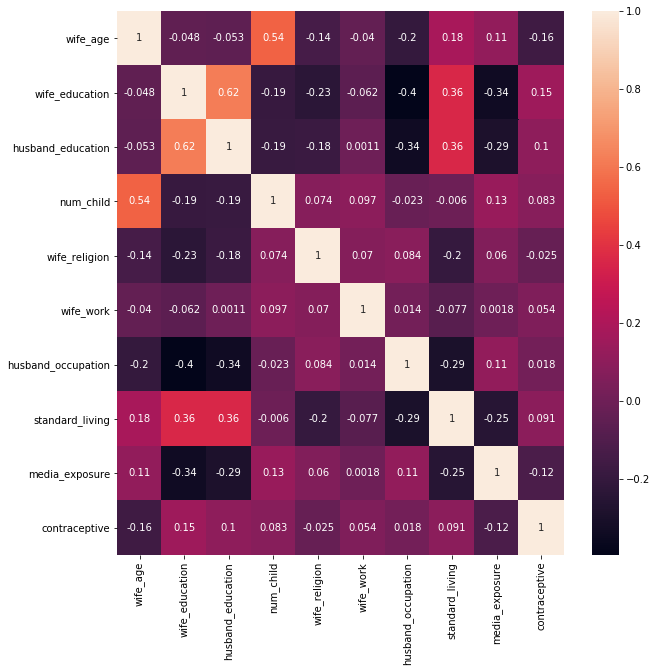

In [951]:
plt.figure(figsize=(10,10))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)

The problem with such a statistic and the plot is that quite a few of the features are categorical and the Pearson correlation, which is being used, is a means of quantifying how much the mean and expectation for two variables change simultaneously. 

Yet, this logic cannot be applied to categorical variables because there is typically no order in categorical variables. Instead, we will use another measure of association, Cramer's V. It varies between 0 and 1 where 0 means little association and 1 means stronger association.

In [952]:
categorical_data = data[categorical_features]
categorical_data.head()

,wife_education,husband_education,wife_religion,wife_work,husband_occupation,standard_living,media_exposure
0,2,3,1,1,2,3,0
1,1,3,1,1,3,4,0
2,2,3,1,1,3,4,0
3,3,2,1,1,3,3,0
4,3,3,1,1,3,2,0


Fortunately, someone already wrote this function for us

Source:
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792

In [953]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [954]:
catCorrfeatures = categorical_features + ['contraceptive']
catCorr = pd.DataFrame(columns=features)

In [955]:
# applying cramers to every pair of categorical feature
arr = []
for feature_1 in catCorrfeatures:
    corrs = np.array([])
    for feature_2 in catCorrfeatures:
        c = cramers_v(data[feature_1], data[feature_2])
        corrs = np.append(corrs, c)
    arr.append(corrs)

In [956]:
#creating a dataframe for calculated Cramer's V values
catCorr = pd.DataFrame(columns=catCorrfeatures, data=arr)
catCorr.index = catCorrfeatures
catCorr

,wife_education,husband_education,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
wife_education,1.000000,0.398398,0.234729,0.068720,0.260296,0.220495,0.402038,0.213780
husband_education,0.398398,1.000000,0.186909,0.000000,0.236124,0.211852,0.297314,0.151974
wife_religion,0.234729,0.186909,0.997326,0.062437,0.112211,0.203694,0.050265,0.115452
wife_work,0.068720,0.000000,0.062437,0.998191,0.048174,0.075932,0.000000,0.046522
husband_occupation,0.260296,0.236124,0.112211,0.048174,1.000000,0.178547,0.121272,0.142089
standard_living,0.220495,0.211852,0.203694,0.075932,0.178547,1.000000,0.260245,0.138206
media_exposure,0.402038,0.297314,0.050265,0.000000,0.121272,0.260245,0.995043,0.141736
contraceptive,0.213780,0.151974,0.115452,0.046522,0.142089,0.138206,0.141736,1.000000


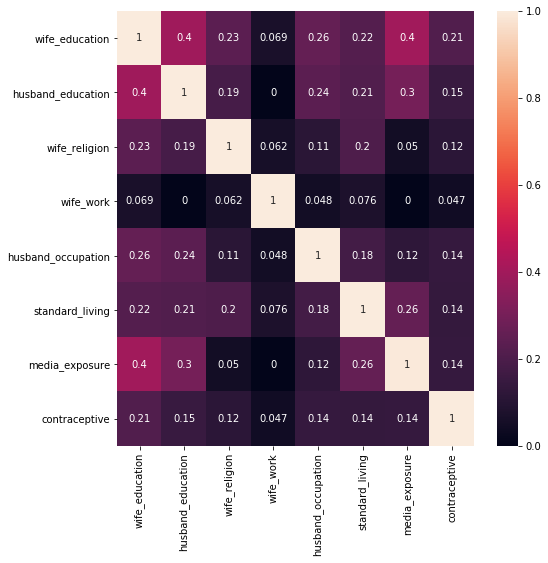

In [957]:
#plotting categorical association between features
catCorr = pd.DataFrame(columns=catCorrfeatures, data=arr)
catCorr.index = catCorrfeatures
plt.figure(figsize=(8,8))
sns.heatmap(catCorr, annot=True)

The features with the lowest Cramer's V values with contraceptives are wife religion, wife work, media_exposure. In contrast, the features that are relatively highly associated with contraceptive are wife education, husband education, standard of living and media exposure. 

However, there is also a strong association between wife education/husband education and media exposure/husband education. This might be indicative of some redundancy in features and for that reason, we will not be using husband education as a feature. We will proceed by dropping the husband education and wife work from both the train and test set.

In [958]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 1384 to 1358
Data columns (total 24 columns):
normalized_wife_age     1178 non-null float64
normalized_num_child    1178 non-null float64
wife_education_1        1178 non-null uint8
wife_education_2        1178 non-null uint8
wife_education_3        1178 non-null uint8
wife_education_4        1178 non-null uint8
husband_education_1     1178 non-null uint8
husband_education_2     1178 non-null uint8
husband_education_3     1178 non-null uint8
husband_education_4     1178 non-null uint8
wife_religion_0         1178 non-null uint8
wife_religion_1         1178 non-null uint8
wife_work_0             1178 non-null uint8
wife_work_1             1178 non-null uint8
husband_occupation_1    1178 non-null uint8
husband_occupation_2    1178 non-null uint8
husband_occupation_3    1178 non-null uint8
husband_occupation_4    1178 non-null uint8
standard_living_1       1178 non-null uint8
standard_living_2       1178 non-null uint8
standa

In [959]:
#Using regex to drop all features related to 'wife work' in the train set
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='wife_work')))]
X_train_trees = X_train_trees[X_train_trees.columns.drop(list(X_train_trees.filter(regex='wife_work')))]

#Using regex to drop all features related to 'wife work' in the test set
X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='wife_work')))]
X_test_trees = X_test_trees[X_test_trees.columns.drop(list(X_test_trees.filter(regex='wife_work')))]

#Using regex to drop all features related to 'husband education' in the train set
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='husband')))]
X_train_trees = X_train_trees[X_train_trees.columns.drop(list(X_train_trees.filter(regex='husband')))]

X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='husband')))]
X_test_trees = X_test_trees[X_test_trees.columns.drop(list(X_test_trees.filter(regex='husband')))]

#Using regex to drop all features related to 'husband education' in the test set
#X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='husband_education')))]
#X_test_trees = X_test_trees[X_test_trees.columns.drop(list(X_test_trees.filter(regex='husband_education')))]

#X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='wife_religion')))]
#X_train_trees = X_train_trees[X_train_trees.columns.drop(list(X_train_trees.filter(regex='wife_religion')))]

#Using regex to drop all features related to 'husband education' in the test set
#X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='wife_religion')))]
#X_test_trees = X_test_trees[X_test_trees.columns.drop(list(X_test_trees.filter(regex='wife_religion')))]

X_train.head()

,normalized_wife_age,normalized_num_child,wife_education_1,wife_education_2,wife_education_3,wife_education_4,wife_religion_0,wife_religion_1,standard_living_1,standard_living_2,standard_living_3,standard_living_4,media_exposure_0,media_exposure_1
1384,0.416954,-0.119384,0,0,0,1,0,1,0,0,0,1,1,0
274,-1.175373,-0.537940,0,0,1,0,0,1,0,0,1,0,1,0
1218,2.009281,0.299172,0,0,1,0,0,1,0,0,0,1,1,0
913,-0.562940,-0.537940,0,0,0,1,0,1,0,0,0,1,1,0
1038,-1.175373,-0.956496,0,0,1,0,0,1,0,0,0,1,1,0


In [960]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178 entries, 1384 to 1358
Data columns (total 14 columns):
normalized_wife_age     1178 non-null float64
normalized_num_child    1178 non-null float64
wife_education_1        1178 non-null uint8
wife_education_2        1178 non-null uint8
wife_education_3        1178 non-null uint8
wife_education_4        1178 non-null uint8
wife_religion_0         1178 non-null uint8
wife_religion_1         1178 non-null uint8
standard_living_1       1178 non-null uint8
standard_living_2       1178 non-null uint8
standard_living_3       1178 non-null uint8
standard_living_4       1178 non-null uint8
media_exposure_0        1178 non-null uint8
media_exposure_1        1178 non-null uint8
dtypes: float64(2), uint8(12)
memory usage: 41.4 KB


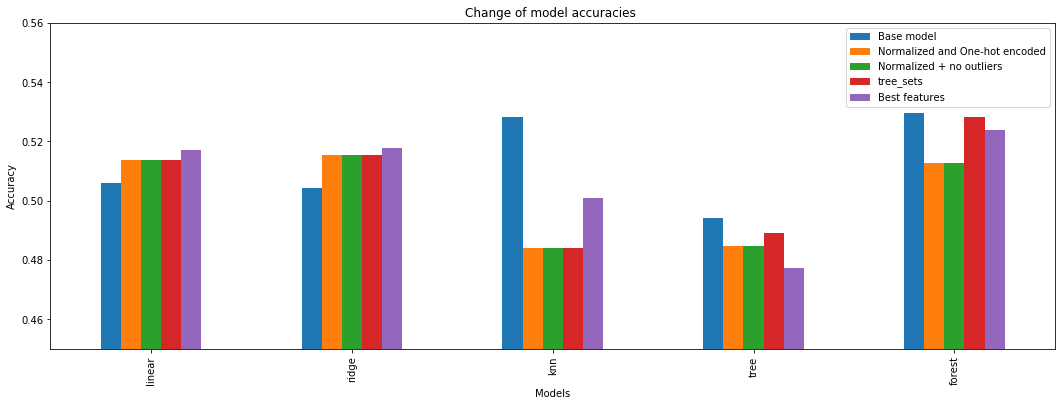

In [961]:
model_accuracies['best_cat_features_accuracy'] = compare_models(linear_model, ridge, knn, tree, forest)
ax = model_accuracies.set_index('model_type').plot(kind='bar',figsize=(18,6))
plt.title('Change of model accuracies ')
ax.legend(['Base model', 'Normalized and One-hot encoded','Normalized + no outliers','tree_sets','Best features'])
#ax.legend(['Base model', 'Normalized and One-hot encoded', 'Best features'])
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0.45, 0.56);

Our choice of features has increased the accuracy of our linear, ridge and knn models but has resulted in a drop in accuracy for our decision tree models. We will continue trying to improve our model by tuning the hyperparameters of all models.

## Hyperparameter tuning

We will use an exhaustive Grid Search for hyperparameter tuning to try find the optimal hyperparameters.

In [962]:
from sklearn.model_selection import GridSearchCV

In [963]:
linear_model = LogisticRegression(max_iter=10000, multi_class='ovr')

#defining the different hyperparameters
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = np.arange(0.2, 2, 0.1)
# solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

#creating the grid of all possible combinations
param_grid = dict(penalty=penalty,
                    C=C)

#model to find best estimator
random = GridSearchCV(estimator=linear_model,
                            param_grid=param_grid,
                            verbose=1, n_jobs=-1)

#fit the model to the train set
lr_random_result = random.fit(X_train, y_train)
lr_score = cross_validate_score(lr_random_result.best_estimator_, X_train, y_train)

#accuracy of tuned linear model
lr_score

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 345 out of 360 | elapsed:    4.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.7s finished


0.5187053732419763

In [964]:
ridge = RidgeClassifier()
alpha = np.arange(1, 3, 0.1)
fit_intercept = [True, False]
param_grid = dict(alpha=alpha,
                           fit_intercept=fit_intercept)
random = GridSearchCV(estimator=ridge,
                    param_grid=param_grid,
                    verbose=1, n_jobs=-1)
ridge_random_result = random.fit(X_train, y_train)
ridge_score = cross_validate_score(ridge_random_result.best_estimator_, X_train, y_train)
#accuracy of tuned ridge model
ridge_score

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.7s finished


0.517854309412189

In [965]:
knn = KNeighborsClassifier()
n_neighbors = np.arange(1, 152, 2)
param_grid = dict(n_neighbors=n_neighbors)
random = GridSearchCV(estimator=knn,
                    param_grid=param_grid,
                    verbose=1, n_jobs=-1)
knn_random_result = random.fit(X_train, y_train)
knn_score = cross_validate_score(knn_random_result.best_estimator_, X_train, y_train)
#accuracy of tuned knn
knn_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 76 candidates, totalling 380 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 380 out of 380 | elapsed:    3.2s finished


0.5602776776054814

In [966]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = np.arange(1, 10, 1)
min_samples_split = np.arange(0, 1, 0.2)
max_leaf_nodes = np.arange(1, 5, 1)
param_grid = dict(criterion=criterion,
                 splitter=splitter,
                 max_depth=max_depth,
                 min_samples_split=min_samples_split,
                 max_leaf_nodes=max_leaf_nodes)
random = GridSearchCV(estimator=tree,
                    param_grid=param_grid,
                    verbose=1, n_jobs=-1)
tree_random_result = random.fit(X_train_trees, y_train)
tree_score = cross_validate_score(tree_random_result.best_estimator_, X_train_trees, y_train)
#accuracy of tuned decision tree
tree_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:    5.9s finished


0.4957663180670754

In [967]:
#randForest = RandomForestClassifier(bootstrap=True, random_state=8)
n_estimators = np.arange(70, 130, 10)
criterion = ['gini', 'entropy']
max_depth = np.arange(2, 10, 1)
max_leaf_nodes = np.arange(2, 7, 1)
param_grid = dict(n_estimators=n_estimators,
                  criterion=criterion,
                 max_depth=max_depth,
                 max_leaf_nodes=max_leaf_nodes)
random = GridSearchCV(estimator=forest,
                        param_grid=param_grid,
                        verbose=1, n_jobs=-1, cv=2)
forest_random_result = random.fit(X_train_trees, y_train)
forest_score = cross_validate_score(forest_random_result.best_estimator_, X_train_trees, y_train)
#accuracy of tuned random forest
forest_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 480 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   50.4s finished


0.547573025604039

In [968]:
cross_validate_score(forest, X_train_trees, y_train)
#accuracy of tuned random forest

0.5237793003966823

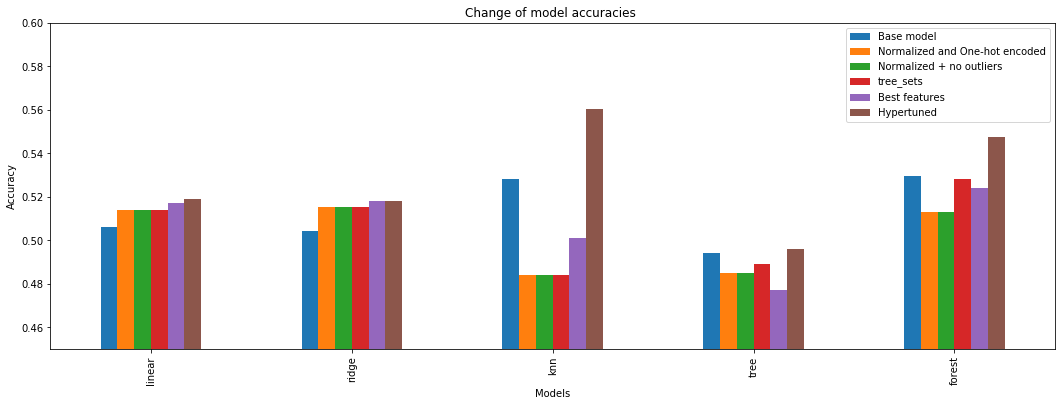

In [969]:
model_accuracies['hyperparameter_tuning_accuracy'] = [lr_score, ridge_score, knn_score, tree_score, forest_score]
ax = model_accuracies.set_index('model_type').plot(kind='bar',figsize=(18,6))
#ax.legend(['Base model', 'Normalized and One-hot encoded', 'Best features', 'Hypertuned'])
ax.legend(['Base model', 'Normalized and One-hot encoded','Normalized + no outliers',
           'tree_sets','Best features','Hypertuned'])
plt.title('Change of model accuracies ')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0.45, 0.60);

## Use v/s No-use

We can try experimenting to see if our models perform better when we try to predict whether a woman uses contraceptives or doesn't use contraceptives. For this model, we do not care it the woman is using short-term or long-term contracpetives. All that matters is that she is or is not using them.

In [970]:
#save copies of the labels
y_train_saved = y_train.copy()
y_test_saved = y_test.copy()

In [971]:
#replace short-term contraceptives with long-term contraceptives
#now, 1 means 'no-use' of contraceptive and 2 means 'uses contraceptives' 
y_train = y_train.replace(3, 2)
y_test = y_test.replace(3, 2)

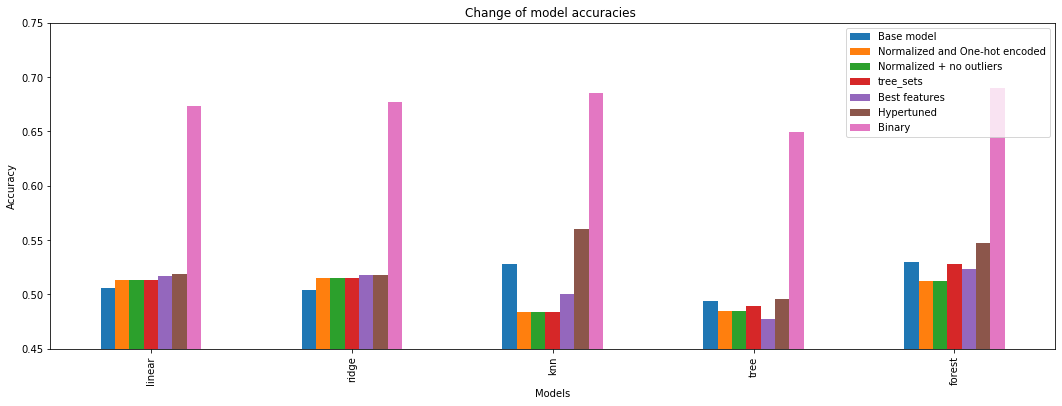

In [972]:
model_accuracies['binary_classifiers'] = compare_models(linear_model, ridge, knn, tree, forest)
ax = model_accuracies.set_index('model_type').plot(kind='bar',figsize=(18,6))
plt.title('Change of model accuracies ')
ax.legend(['Base model', 'Normalized and One-hot encoded','Normalized + no outliers',
           'tree_sets','Best features','Hypertuned','Binary'])
#ax.legend(['Base model', 'Normalized and One-hot encoded', 'Best features', 'Hypertuned', 'Binary'])
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0.45, 0.75);

As expected, our models all perform better when the task is reduced to a binary classification problem. This might simply be bacause the number of possible classes has decreased. We can still try to do better by tuning the hyperparameters of our binary classifiers.

In [973]:
linear_model = LogisticRegression(max_iter=10000, multi_class='ovr')
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = np.arange(0.2, 2, 0.2)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
param_grid = dict(penalty=penalty,
                           C=C,
                           solver=solver)
random = GridSearchCV(estimator=linear_model,
                            param_grid=param_grid,
                            verbose=1, n_jobs=-1)
lr_random_result_binary = random.fit(X_train, y_train)
binary_lr_score = cross_validate_score(lr_random_result_binary.best_estimator_, X_train, y_train)
binary_lr_score

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    2.3s finished


0.6834006491164804

In [974]:
ridge = RidgeClassifier()
alpha = np.arange(1, 3, 0.1)
fit_intercept = [True, False]
param_grid = dict(alpha=alpha,
                           fit_intercept=fit_intercept)
random = GridSearchCV(estimator=ridge,
                    param_grid=param_grid,
                    verbose=1, n_jobs=-1)
ridge_random_result_binary = random.fit(X_train, y_train)
binary_ridge_score = cross_validate_score(ridge_random_result_binary.best_estimator_, X_train, y_train)
binary_ridge_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.7s finished


0.6766065632888569

In [975]:
knn = KNeighborsClassifier()
n_neighbors = np.arange(1, 102, 1)
param_grid = dict(n_neighbors=n_neighbors)
random = GridSearchCV(estimator=knn,
                    param_grid=param_grid,
                    verbose=1, n_jobs=-1)
knn_random_result_binary = random.fit(X_train, y_train)
binary_knn_score = cross_validate_score(knn_random_result_binary.best_estimator_, X_train, y_train)
binary_knn_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 101 candidates, totalling 505 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 490 out of 505 | elapsed:    3.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 505 out of 505 | elapsed:    3.4s finished


0.7020627479264336

In [976]:
tree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = np.arange(1, 10, 1)
min_samples_split = np.arange(0, 1, 0.2)
max_leaf_nodes = np.arange(1, 5, 1)
param_grid = dict(criterion=criterion,
                 splitter=splitter,
                 max_depth=max_depth,
                 min_samples_split=min_samples_split,
                 max_leaf_nodes=max_leaf_nodes)
random = GridSearchCV(estimator=tree,
                    param_grid=param_grid,
                    verbose=1, n_jobs=-1)
tree_random_result_binary = random.fit(X_train_trees, y_train)
binary_tree_score = cross_validate_score(tree_random_result_binary.best_estimator_, X_train_trees, y_train)
binary_tree_score

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3483 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:    5.2s finished


0.7012152902993147

In [977]:
randForest = RandomForestClassifier()
n_estimators = np.arange(50, 150, 10)
criterion = ['gini', 'entropy']
max_depth = np.arange(2, 10, 1)
max_leaf_nodes = np.arange(2, 5, 1)
param_grid = dict(n_estimators=n_estimators,
                  criterion=criterion,
                 max_depth=max_depth,
                 max_leaf_nodes=max_leaf_nodes)
random = GridSearchCV(estimator=randForest,
                        param_grid=param_grid,
                        verbose=1, n_jobs=-1)
forest_random_result_binary = random.fit(X_train_trees, y_train)
binary_forest_score = cross_validate_score(forest_random_result_binary.best_estimator_, X_train_trees, y_train)
binary_forest_score

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1674 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2224 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  2.0min finished


0.6952650558961414

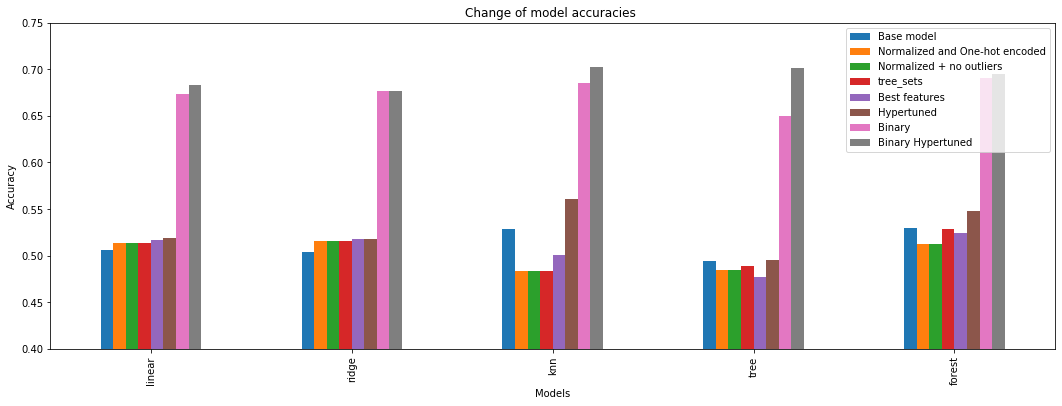

In [978]:
model_accuracies['binary_hyperparameter_tuning_accuracy'] = [binary_lr_score, binary_ridge_score, binary_knn_score, binary_tree_score, binary_forest_score]
ax = model_accuracies.set_index('model_type').plot(kind='bar',figsize=(18,6))
#ax.legend(['Base model', 'Normalized and One-hot encoded', 'Best features', 'Hypertuned', 'Binary', 'Binary Hypertuned'])
ax.legend(['Base model', 'Normalized and One-hot encoded','Normalized + no outliers',
           'tree_sets','Best features','Hypertuned','Binary','Binary Hypertuned'])
plt.title('Change of model accuracies ')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0.40, 0.75);

## Time for testing

We can now see how all of our models perform on the test set.

In [979]:
#reset original labels for the train and test set
y_train = y_train_saved
y_test = y_test_saved

In [980]:
#calculate accuraries of best predictors on the test set
model_accuracies['test_accuracy'] = lr_random_result.best_estimator_.score(X_test, y_test), \
                                    ridge_random_result.best_estimator_.score(X_test, y_test), \
                                    knn_random_result.best_estimator_.score(X_test, y_test), \
                                    tree_random_result.best_estimator_.score(X_test_trees, y_test), \
                                    forest_random_result.best_estimator_.score(X_test_trees, y_test)

Since the original question we were trying to answer was whether we were able to predict the type of contraceptive used, we will not be comparing the test results to the accuracies of our binary classifiers.

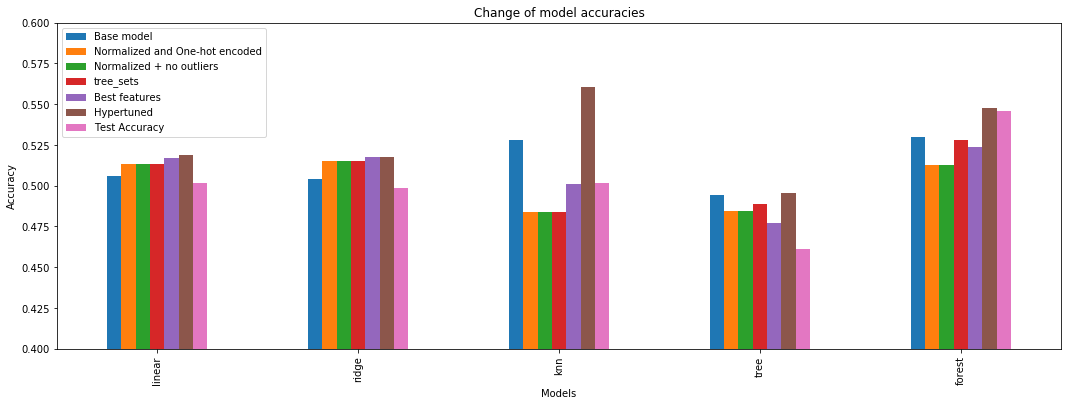

In [981]:
# ax = model_accuracies.set_index('model_type').plot(kind='bar',figsize=(18,6))
ax = model_accuracies.set_index('model_type').drop(columns=['binary_classifiers', 'binary_hyperparameter_tuning_accuracy']).plot(kind='bar',figsize=(18,6))
plt.title('Change of model accuracies')
#ax.legend(['Base model', 'Normalized and One-hot encoded', 'Best features', 'Hypertuned', 'Test Accuracy'])
ax.legend(['Base model', 'Normalized and One-hot encoded','Normalized + no outliers',
           'tree_sets','Best features','Hypertuned', 'Test Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0.40, 0.60);

In [982]:
knn_random_result.best_params_

{'n_neighbors': 141}

Our best model on the test set is the neighrest neighbor classifier which is a 61-NN classifier.

We can now determine what features our model deem important. For a decision tree we can visualize the nodes of the tree.

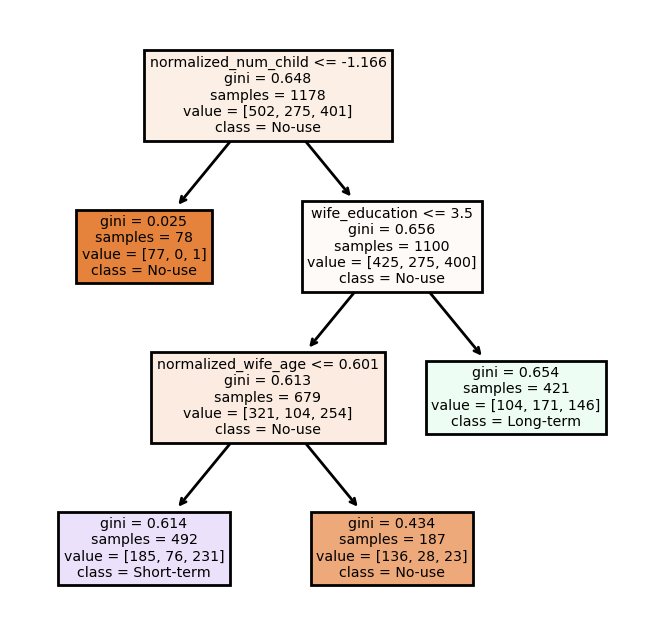

In [983]:
from sklearn import tree
fn=X_train_trees.columns
cn=['No-use', 'Long-term', 'Short-term']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(tree_random_result.best_estimator_,
               feature_names = fn, 
               class_names=cn,
               filled = True);

Since the nodes closer to the root use the `number of children` and the `wife age`, we can infer than those are important features for our decision tree.

In [984]:
model_accuracies.set_index('model_type')[['test_accuracy']]

,test_accuracy
model_type,
linear,0.501695
ridge,0.498305
knn,0.501695
tree,0.461017
forest,0.545763


The second best model is the random forest which quite unsurprisingly performs better than the single decision tree. We can in fact find which features the random forest found the most important for classification.

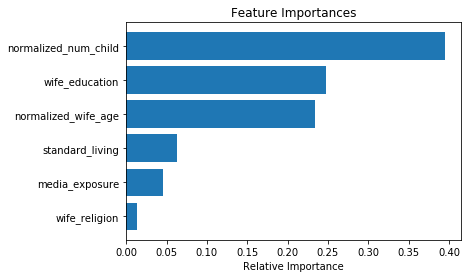

In [985]:
importances = forest_random_result.best_estimator_.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train_trees.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The number of children a woman had is relatively the most important factor in determining the type of contraceptives used by a woman. This, in fact, supports our initial guess that the `number of children` might be the best predictor of the use of contraceptives. One surprising discovery is that the `wife religion` feature is not as important to our random forest even if we initially thought religion would have a greater bearing on the choice of contraceptives.